In [8]:
from sys import path
path.append("..")

import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdd import measures
from rdd import RDD
from rdd import visualize
from rdd import other_sims
from rdd import ascos
from rdd import cos_sim
from rdd.utils import df_to_cluster_list
from rdd.other_sims import kmeans2, kmedoid_clustering2, simrank


In [10]:
G1, G2 = nx.Graph(), nx.Graph()

G1.add_edges_from([
    (1, 2),
    (2, 3),
    (2, 4),
    (3, 4),
    (3, 6),
    (4, 5),
])

G2.add_edges_from([
    (1,2),
    (2,4),
    (2,3),
    (3,5),
    (4,5),
    (5,6)
])

# G2.add_edges_from([
#     (5, 2),
#     (2, 3),
#     (2, 4),
#     (3, 4),
#     (3, 6),
#     (4, 1),
# ])


G3 = nx.read_adjlist('../data/facebook_combined.txt', nodetype=int)
G4 = nx.read_gml('../data/karate.gml', label='id')

real_paths1 = nx.single_source_shortest_path(G3, 1, 2)
node_list1 = RDD.populate_node_list(real_paths1)
list_of_nodes = []
for node in node_list1:
    list_of_nodes.append(node.name)
G5 = RDD.nodes_to_graph(G3, list_of_nodes)
G6 = nx.read_gml('../data/lesmiserables.gml')
G7 = nx.read_adjlist('../data/Cattle_protein_interactions_(IntAct).txt')
G8 = nx.read_adjlist('../data/rat_protein_interactions_(IntAct).txt')

target_G = G7
target_rad = 2
measure_list = measures.global_graph_degree

pos = nx.spring_layout(target_G)

In [12]:
TG1, TG2 = nx.Graph(), nx.Graph()
TG3, TG4 = nx.Graph(), nx.Graph()
TG5, TG6 = nx.Graph(), nx.Graph()
TG7 = nx.Graph()

TG1.add_edges_from([
    (1, 2),
])

TG2.add_edges_from([
    (1,2),
    (2,3),
])

TG3.add_edges_from([
    (1,2),
    (2,3),
    (3,1),
])

TG4.add_edges_from([
    (1,2),
    (2,3),
    (3,1),
    (1,4),
])

TG5.add_edges_from([
    (1,2),
    (2,4),
    (2,3),
    (3,4),
    (4,1),
])

TG6.add_edges_from([
    (1,2),
    (2,3),
    (3,4),
    (4,1),
])

TG7.add_edges_from([
    (1,2),
    (2,3),
    (3,4),
    (4,1),
    (2,4),
    (3,1),
])

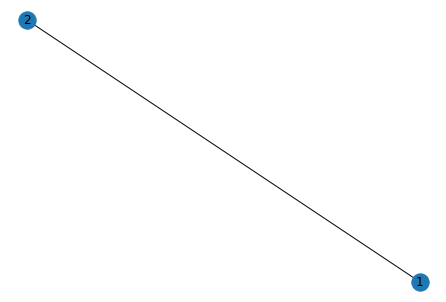

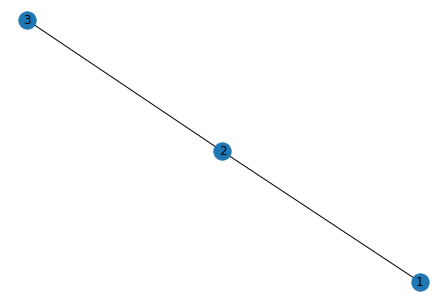

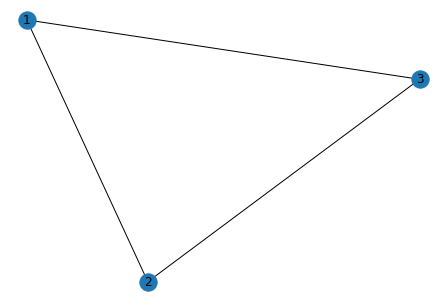

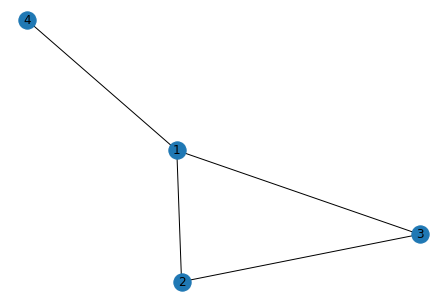

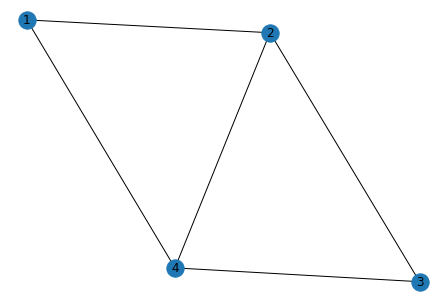

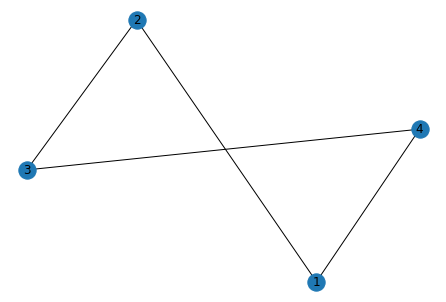

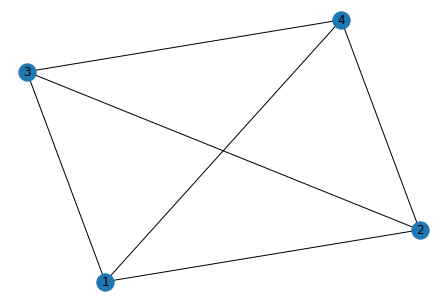

In [14]:
fig = plt.figure()
nx.draw(TG1, with_labels = True)
fig2 = plt.figure()
nx.draw(TG2, with_labels = True)
fig3 = plt.figure()
nx.draw(TG3, with_labels = True)
fig4 = plt.figure()
nx.draw(TG4, with_labels = True)
fig5 = plt.figure()
nx.draw(TG5, with_labels = True)
fig6 = plt.figure()
nx.draw(TG6, with_labels = True)
fig7 = plt.figure()
nx.draw(TG7, with_labels = True)

In [16]:
def get_rdd_between_graphs_df(simTargetGraph_1, simTargetGraph_2):
    x1 = 0
    y1 = 0

    if(len(simTargetGraph_2) > len(simTargetGraph_1)):
        x1 = len(simTargetGraph_2)
        y1 = len(simTargetGraph_2)
        # print("more rows")
    elif(len(simTargetGraph_2) < len(simTargetGraph_1)):
        # print("more columns")
        y1 = len(simTargetGraph_1)
        x1 = len(simTargetGraph_1)
    else:
        x1 = len(simTargetGraph_2)
        y1 = len(simTargetGraph_1)
        # print("same")


    df = pd.DataFrame(0.0, index=np.arange(y1), columns=range(0, x1))
    count1 = 0
    for node in simTargetGraph_1:
        list_for_distance = {}
        count2 = 0
        for node2 in simTargetGraph_2:
            x = RDD.realworld_distance_compare(simTargetGraph_1, node, node2, measures.global_graph_degree, target_rad, simTargetGraph_2)
            list_for_distance[count2] = x
            df[count1][count2] = x
            count2 += 1
        # dic[count1] = list_for_distance
        count1 += 1

    # df2 = df.from_dict(dic)

    return df

def rdd_similarity_between_graphs(simTargetGraph_1, simTargetGraph_2):
    df = get_rdd_between_graphs_df(simTargetGraph_1, simTargetGraph_2)

    total = 0
    count1 = 0
    for node in simTargetGraph_1:
        count2 = 0
        for node2 in simTargetGraph_2:
            total = total + abs(df[count1][count2] - df[count2][count1])
            count2 += 1
        count1 += 1
    # return (total/2)
    return (total/(len(simTargetGraph_1)*len(simTargetGraph_2)))

def get_rdds_between_2_sets_of_graphs(target_graphs_1, target_graphs_2):
    x1 = 0
    y1 = 0

    if(len(target_graphs_2) > len(target_graphs_1)):
        x1 = len(target_graphs_2)
        y1 = len(target_graphs_2)
        # print("more rows")
    elif(len(target_graphs_2) < len(target_graphs_1)):
        # print("more columns")
        y1 = len(target_graphs_1)
        x1 = len(target_graphs_1)
    else:
        x1 = len(target_graphs_2)
        y1 = len(target_graphs_1)
        # print("same")
        
    sim_between_graphs_df = pd.DataFrame(0.0, index=np.arange(y1), columns=range(0, x1))

    for target_1 in range(0, len(target_graphs_1)):
        for target_2 in range(0, len(target_graphs_2)):
            sim_between_graphs_df[target_1][target_2] = rdd_similarity_between_graphs(target_graphs_1[target_1], target_graphs_2[target_2])
            # print(rdd_similarity_between_graphs(target_graphs_1[target_1], target_graphs_2[target_2]))
    return (sim_between_graphs_df)

def rdd_similarity_between_2_sets_of_graphs(target_graphs_1, target_graphs_2):
    df = get_rdds_between_2_sets_of_graphs(target_graphs_1, target_graphs_2)

    total = 0
    count1 = 0
    for node in target_graphs_1:
        count2 = 0
        for node2 in target_graphs_2:
            total = total + abs(df[count1][count2] - df[count2][count1])
            count2 += 1
        count1 += 1
    # return (total/2)
    return (total/(len(target_graphs_1)*len(target_graphs_2)))


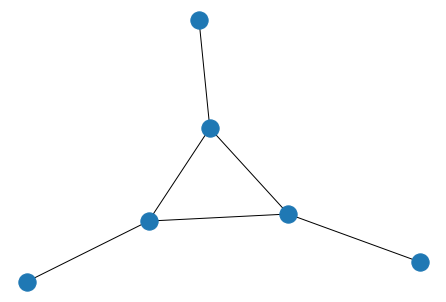

In [18]:
nx.draw(G1)

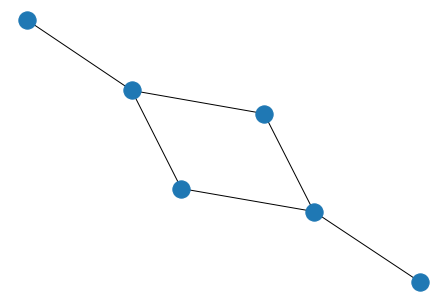

In [20]:
nx.draw(G2)

In [22]:
from numpy.linalg import norm
simTGraph_1 = TG6
simTGraph_2 = TG7

# print(len(simTGraph_1), len(simTGraph_2))

print(get_rdd_between_graphs_df(simTGraph_1, simTGraph_2))


          0         1         2         3
0  3.748618  3.748618  3.748618  3.748618
1  3.748618  3.748618  3.748618  3.748618
2  3.748618  3.748618  3.748618  3.748618
3  3.748618  3.748618  3.748618  3.748618


In [24]:
# simTGraph_1 = G2
# simTGraph_2 = G1

# print(len(simTGraph_1), len(simTGraph_2))

print(rdd_similarity_between_graphs(simTGraph_1, simTGraph_2))

0.0


In [26]:
t_graphs_1 = [TG1, TG2, TG3, TG4, TG5, TG6, TG7]
t_graphs_2 = [TG1, TG2, TG3, TG4, TG5, TG6, TG7]

print(get_rdds_between_2_sets_of_graphs(t_graphs_1, t_graphs_2))

          0         1         2         3         4         5         6
0  0.000000  0.578586  0.823839  1.438762  2.471518  1.641765  2.839397
1  0.578586  0.000000  0.728244  0.826165  1.968744  1.003215  2.211040
2  0.823839  0.728244  0.000000  0.867344  0.717414  0.067668  0.801819
3  1.438762  0.826165  0.867344  0.000000  1.168091  0.683940  1.504822
4  2.471518  1.968744  0.717414  1.168091  0.000000  0.867879  1.003215
5  1.641765  1.003215  0.067668  0.683940  0.867879  0.000000  0.000000
6  2.839397  2.211040  0.801819  1.504822  1.003215  0.000000  0.000000


In [28]:
# t_graphs_1 = [G1, G2]
# t_graphs_2 = [G2, G1]

print(rdd_similarity_between_2_sets_of_graphs(t_graphs_1, t_graphs_2))


1.3594567648471304e-17


[[0.         0.57858629 0.82383925 1.43876181 2.47151776 1.64176473
  2.83939721]
 [0.57858629 0.         0.72824445 0.82616519 1.96874366 1.00321472
  2.21103974]
 [0.82383925 0.72824445 0.         0.86734365 0.71741425 0.06766764
  0.80181916]
 [1.43876181 0.82616519 0.86734365 0.         1.16809124 0.68393972
  1.50482209]
 [2.47151776 1.96874366 0.71741425 1.16809124 0.         0.86787944
  1.00321472]
 [1.64176473 1.00321472 0.06766764 0.68393972 0.86787944 0.
  0.        ]
 [2.83939721 2.21103974 0.80181916 1.50482209 1.00321472 0.
  0.        ]]


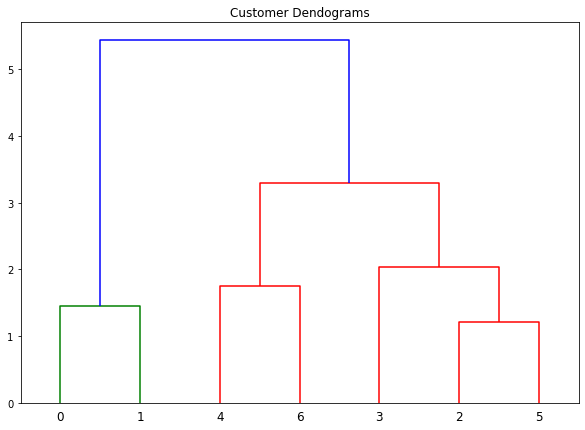

In [30]:
import scipy.cluster.hierarchy as shc

data = get_rdds_between_2_sets_of_graphs(t_graphs_1, t_graphs_2)
data = np.array(data)
print(data)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))



In [32]:
from sklearn.cluster import AgglomerativeClustering

data = data = get_rdds_between_2_sets_of_graphs(t_graphs_1, t_graphs_2)
data = np.array(data)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 0, 0, 2, 0, 2])

In [34]:
from sklearn_extra.cluster import KMedoids


data = data = get_rdds_between_2_sets_of_graphs(t_graphs_1, t_graphs_2)
data = np.array(data)
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(data)
kmedoids.labels_

array([3, 3, 1, 0, 2, 1, 2])

# --------- BELOW CODE IS USED TO SEE BACKGROUND INFO --------

In [36]:
simTargetGraph_1 = G1
simTargetGraph_2 = G2

dic = {}
df = pd.DataFrame()
for node in simTargetGraph_1:
    list_for_distance = {}
    for node2 in simTargetGraph_2:
        x = RDD.realworld_distance_compare(simTargetGraph_1, node, node2, measures.global_graph_degree, target_rad, simTargetGraph_2)
        list_for_distance[node2] = x
    dic[node] = list_for_distance

df = df.from_dict(dic)

print(df)

          1         2         3         4         6         5
1  0.270671  4.748618  4.748618  4.748618  0.270671  0.270671
2  3.606853  0.871094  0.871094  0.871094  3.606853  3.606853
4  2.742188  1.735759  1.735759  1.735759  2.742188  2.742188
3  2.742188  1.735759  1.735759  1.735759  2.742188  2.742188
5  3.606853  0.871094  0.871094  0.871094  3.606853  3.606853
6  0.270671  4.748618  4.748618  4.748618  0.270671  0.270671


In [38]:
total = 0
for node in simTargetGraph_1:
    for node2 in simTargetGraph_2:
        total = total + abs(df[node][node2] - df[node2][node])
print(total)

50.3777777385937
